In [86]:
import pickle
data = pickle.load(open("data/data.plk", "rb"))

In [87]:
len(data)

4351

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

wordnet_lemmatizer = WordNetLemmatizer()

In [89]:
def get_lemmatized_words(sentence):
    _temp = []
    tokens = nltk.word_tokenize(sentence)
    lmtzr = WordNetLemmatizer()
    
    for word, token in nltk.pos_tag(tokens):
        _temp.append(lmtzr.lemmatize(word.strip().lower(), get_wordnet_pos(token)))
    return " ".join(_temp)

In [90]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [52]:
[[word for word in get_lemmatized_words(x["název (anglicky)"]).split(" ")] for x in data[:2] if len(x["název (anglicky)"]) > 2]

[['salzella',
  'be',
  'a',
  'domain',
  'specific',
  'declarative',
  'language',
  '.',
  'it',
  'primary',
  'focus',
  'lie',
  'in',
  'the',
  'field',
  'of',
  'music',
  'generation',
  '.',
  'the',
  'key',
  'principle',
  'upon',
  'which',
  'the',
  'language',
  'be',
  'build',
  'can',
  'be',
  'summarize',
  'a',
  'follow',
  ':',
  'for',
  'any',
  'exist',
  'piece',
  'of',
  'music',
  'it',
  'should',
  'be',
  'possible',
  'to',
  'create',
  'a',
  'salzella',
  'program',
  'which',
  'will',
  'describe',
  'it',
  'in',
  'a',
  'way',
  'that',
  'run',
  'this',
  'program',
  'will',
  'output',
  'a',
  'piece',
  'of',
  'music',
  'similar',
  'to',
  'the',
  'original',
  '.',
  'salzella',
  'program',
  'be',
  'presume',
  'to',
  'be',
  'generate',
  'rather',
  'then',
  'write',
  'by',
  'hand',
  '.',
  'the',
  'sole',
  'purpose',
  'of',
  'salzella',
  'be',
  'to',
  'make',
  'creation',
  'of',
  'music',
  'generating',
  '

In [91]:
from gensim import corpora,models, similarities

abstract_list = [[word for word in get_lemmatized_words(x["název (anglicky)"]).split(" ")] for x in data if len(x["název (anglicky)"]) > 2]
print(len (abstract_list))
# corpora.Dictionary(): Dictionary encapsulates the mapping between normalized words and their integer ids.
dictionary = corpora.Dictionary(abstract_list)
print(dictionary)

appear_once_ids = [tokenid for tokenid, docfreq in dictionary.dfs.items() if docfreq == 1]

# filter_tokens(): Remove the selected bad_ids tokens from all dictionary mappings
dictionary.filter_tokens(appear_once_ids)

# compactify(): Assign new word ids to all words
dictionary.compactify()

print(dictionary)
    

4217
Dictionary(4105 unique tokens: ['semantic', 'instant', 'frontend', 'experimental', 'behavior']...)
Dictionary(1872 unique tokens: ['programmer', 'semantic', 'instant', 'ieee', 'frontend']...)


In [83]:
[dictionary.doc2bow(words) for words in abstract_list[:3]]

[[(117, 2),
  (131, 1),
  (143, 1),
  (146, 3),
  (164, 1),
  (247, 1),
  (337, 1),
  (345, 2),
  (403, 1),
  (492, 1),
  (514, 1),
  (544, 2),
  (555, 13),
  (589, 2),
  (705, 3),
  (725, 1),
  (726, 1),
  (877, 2),
  (893, 2),
  (895, 1),
  (900, 5),
  (902, 1),
  (967, 2),
  (978, 1),
  (1010, 5),
  (1062, 3),
  (1063, 1),
  (1209, 1),
  (1284, 1),
  (1307, 1),
  (1400, 1),
  (1449, 1),
  (1627, 2),
  (1655, 1),
  (1809, 16),
  (1816, 1),
  (1827, 5),
  (1833, 1),
  (1962, 1),
  (2015, 1),
  (2057, 1),
  (2105, 2),
  (2106, 6),
  (2107, 1),
  (2119, 3),
  (2405, 1),
  (2573, 1),
  (2586, 1),
  (2593, 1),
  (2675, 2),
  (2798, 1),
  (2826, 2),
  (2848, 19),
  (2864, 1),
  (3090, 1),
  (3116, 1),
  (3170, 2),
  (3174, 2),
  (3214, 1),
  (3371, 1),
  (3429, 1),
  (3437, 1),
  (3483, 1),
  (3594, 1),
  (3603, 1),
  (3643, 1),
  (3646, 1),
  (3780, 3),
  (3942, 3),
  (3978, 6),
  (4011, 6),
  (4022, 1),
  (4036, 2),
  (4228, 2),
  (4270, 1),
  (4274, 6),
  (4406, 1),
  (4407, 1),
  (4465

In [92]:
# doc2bow(): Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples
corpus = [dictionary.doc2bow(words) for words in abstract_list]

#corpora.mmcorpus.MmCorpus.serialize('data/shkspr.mm', corpus)

# TfidfModel(): word-document co-occurrence matrix (integers) into a locally/globally weighted TF_IDF matrix (positive floats)
tfidf = models.TfidfModel(corpus)

In [93]:
# LsiModel():  Latent Semantic Analysis (aka Latent Semantic Indexing)
lsi = models.lsimodel.LsiModel(corpus=tfidf[corpus], id2word=dictionary,num_topics=4,power_iters=50,onepass=False,chunksize=20)
for i, topic in enumerate(lsi.print_topics(5)):
    print('Topic {}:'.format(i))
    print(topic[1].replace(' + ', "\n"))
    print('')

Topic 0:
0.378*"system"
0.307*"of"
0.298*"for"
0.272*"information"
0.248*"the"
0.226*"web"
0.199*"application"
0.195*"and"
0.192*"management"
0.162*"a"

Topic 1:
-0.560*"information"
-0.545*"system"
0.240*"application"
0.181*"web"
-0.156*"management"
0.150*"of"
0.134*"in"
0.126*"the"
0.104*"interface"
0.102*"data"

Topic 2:
0.553*"web"
0.349*"application"
0.320*"management"
-0.277*"the"
-0.256*"of"
-0.183*"in"
0.179*"project"
-0.167*"implementation"
-0.134*"and"
0.127*"interface"

Topic 3:
0.622*"management"
0.395*"project"
-0.369*"web"
-0.294*"information"
0.255*"software"
0.126*"content"
-0.121*"interface"
0.104*"tool"
-0.100*"service"
0.100*"network"



In [94]:
papers = [(x["název (anglicky)"], x["katedra"] ) for x in data]
universities = list(set([x["katedra"] for x in data]))

In [95]:
universities

['',
 'K13117',
 'K104',
 'K102',
 'K103',
 'K101',
 'K13134',
 'K13133',
 'K13132',
 'K13135',
 'K13139',
 'K13113',
 'K13116',
 'K13138',
 'K13102',
 'K105',
 'K13114',
 'K13136',
 'K13115',
 'K13131']

In [61]:
papers[:2]

[('Salzella - A Declarative Language for Music Generation', 'K13139'),
 ('Client-server application for illustrative exploded views of 3D models',
  'K13139')]

In [96]:
# Calculate a similarity value between each tcc
matsim = similarities.MatrixSimilarity(lsi[tfidf[corpus]], num_best=6)

In [104]:
def format_topic_coeffs(topic):
    """Return a list of coefficent, word tuples with coefficent truncated to 
    3 decimal places.
    """
    return [(coeff, word) for coeff, word in topic]

def plot_axes(x=0, y=1, model=lsi, corpus=corpus, 
              tfidf=tfidf, papers=papers, universities=universities):
    x_data = defaultdict(list)
    y_data = defaultdict(list)
    chars = defaultdict(list)
    print('x topic:')
    print(format_topic_coeffs(model.show_topic(x)))
    print('')
    print('y topic:')
    print(format_topic_coeffs(model.show_topic(y)))
    for paper, doc in zip(papers, corpus):
        university = paper[1]
        if len(model[tfidf[doc]]) != 0:
            x_data[university].append((model[tfidf[doc]][x][1]))
            y_data[university].append((model[tfidf[doc]][y][1]))
            '''Remove the comment of the next line to show titles of each work'''
            #chars[university].append(paper[0])
    print("next")    
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    cmap = plt.get_cmap('Paired')
    university_index = {university: i for i, university in enumerate(universities)}
    for university in university_index:
        color_index = university_index[university] / float(len(university_index))
        plt.scatter(x_data[university], y_data[university], color=cmap(color_index), 
                    label=university, alpha=.5, s=40)
        for char, x, y in zip(chars[university], x_data[university], y_data[university]):
            ax.annotate(char, xy=(x, y), xycoords='data', xytext=(1, 1), 
                        textcoords='offset points', size=10)
    plt.legend(loc=1, ncol=2, scatterpoints=1)
    plt.show()

x topic:
[('system', 0.37795221162317483), ('of', 0.30667720285333777), ('for', 0.29763124208033204), ('information', 0.27165121072447818), ('the', 0.24802550328530684), ('web', 0.2264657954273098), ('application', 0.19906685464793458), ('and', 0.19544917795603522), ('management', 0.19240727044420558), ('a', 0.16198243771977355)]

y topic:
[('information', -0.55950617580396478), ('system', -0.54517775638470978), ('application', 0.24001265558600549), ('web', 0.18076528400280459), ('management', -0.15649499215966589), ('of', 0.15037970872540482), ('in', 0.13438733997438534), ('the', 0.12592093991975667), ('interface', 0.10387739674458007), ('data', 0.10233407370259412)]
next


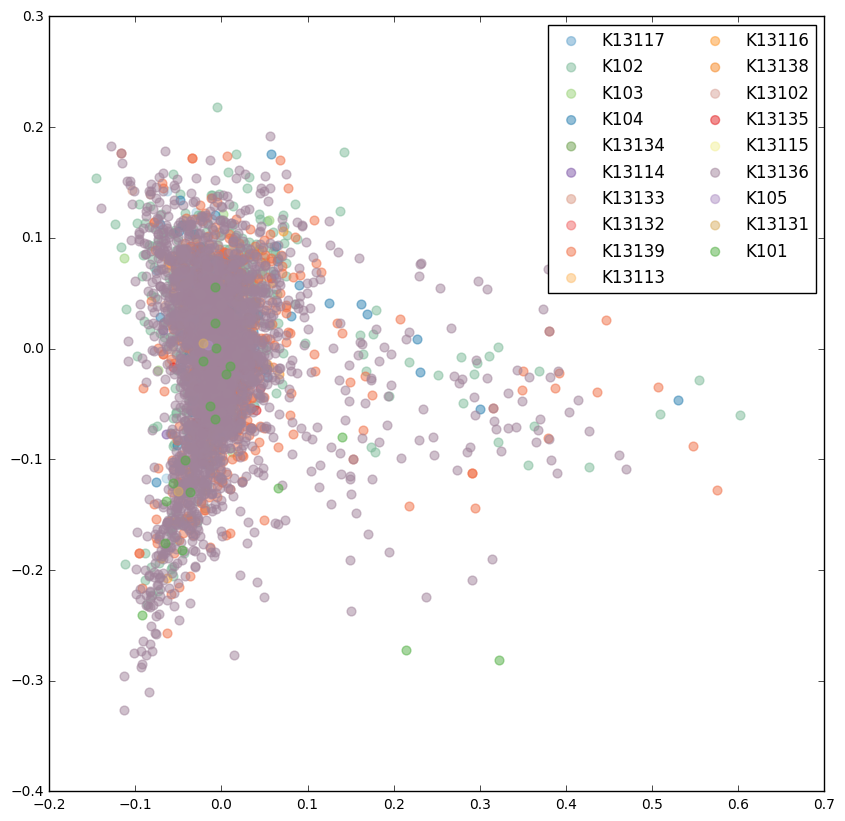

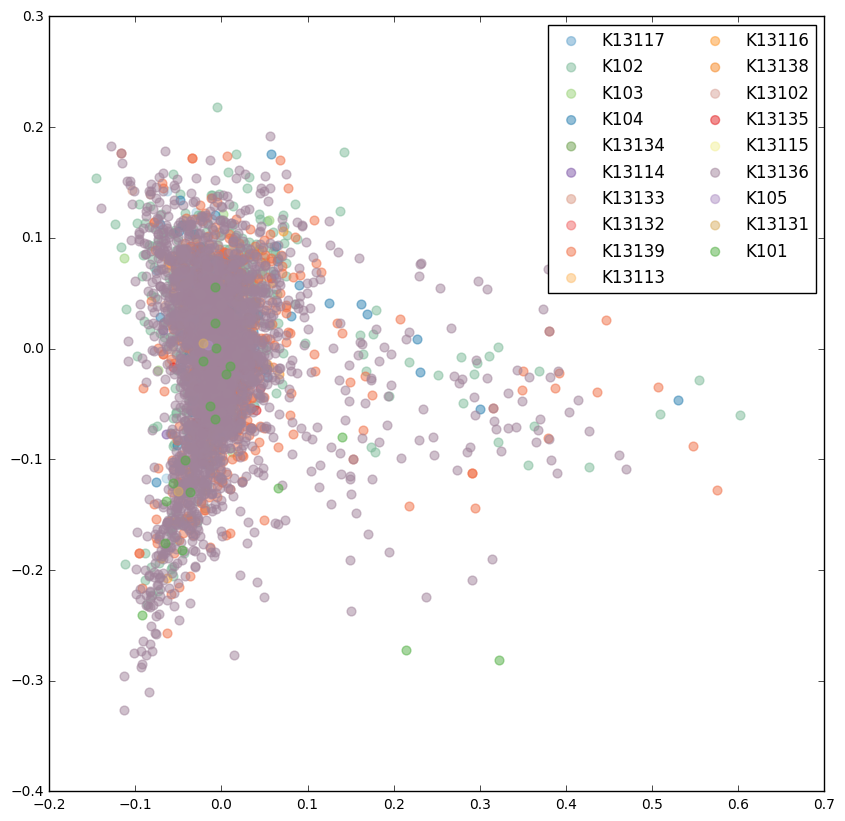

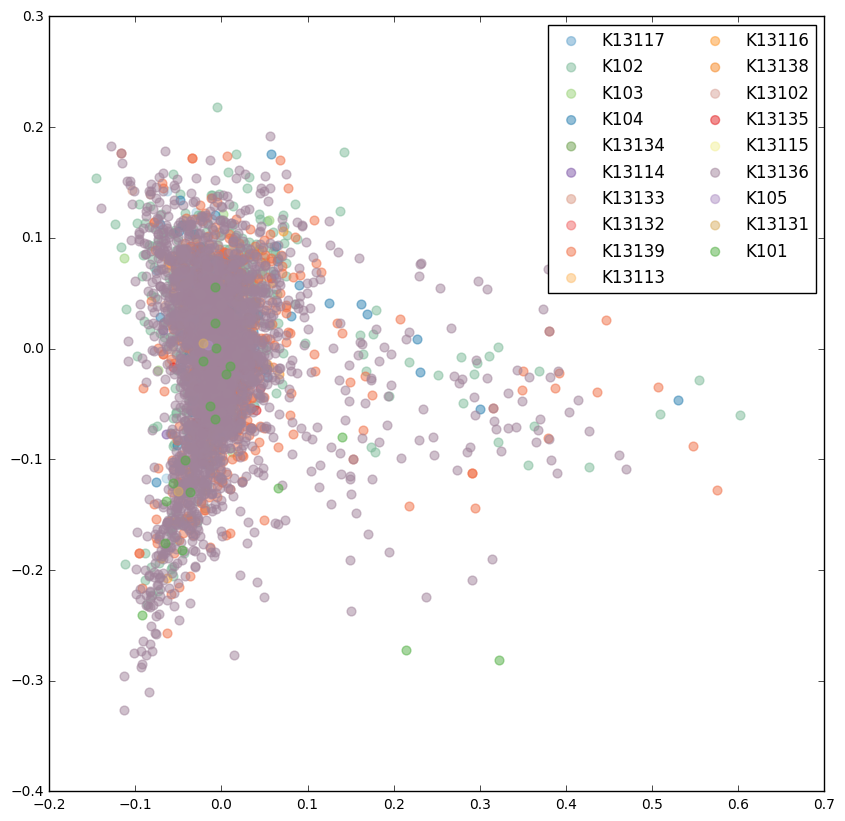

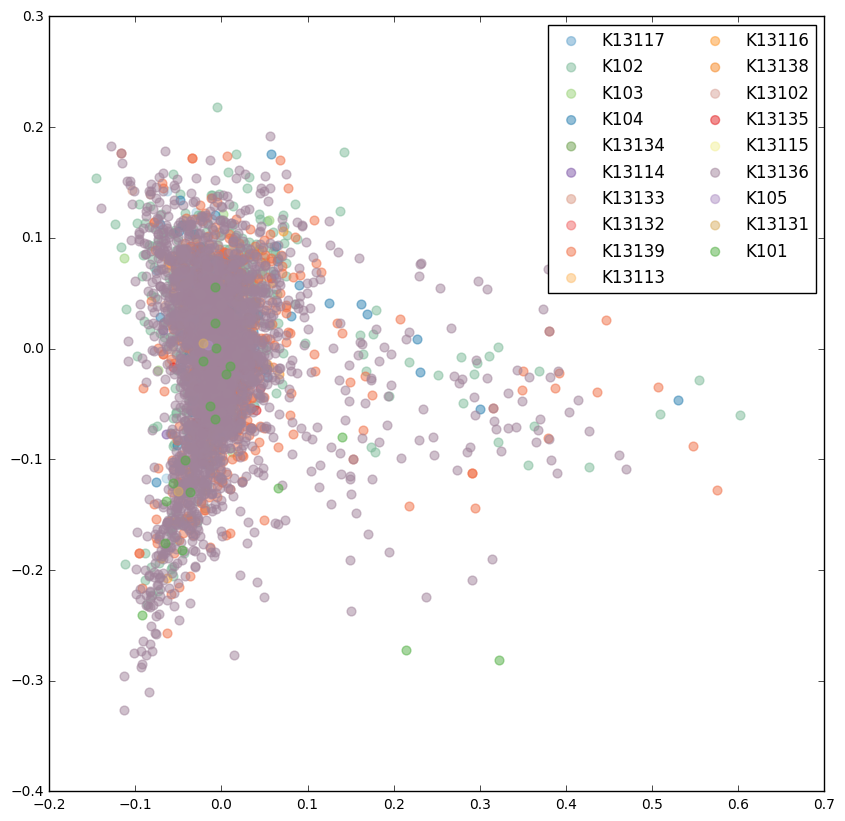

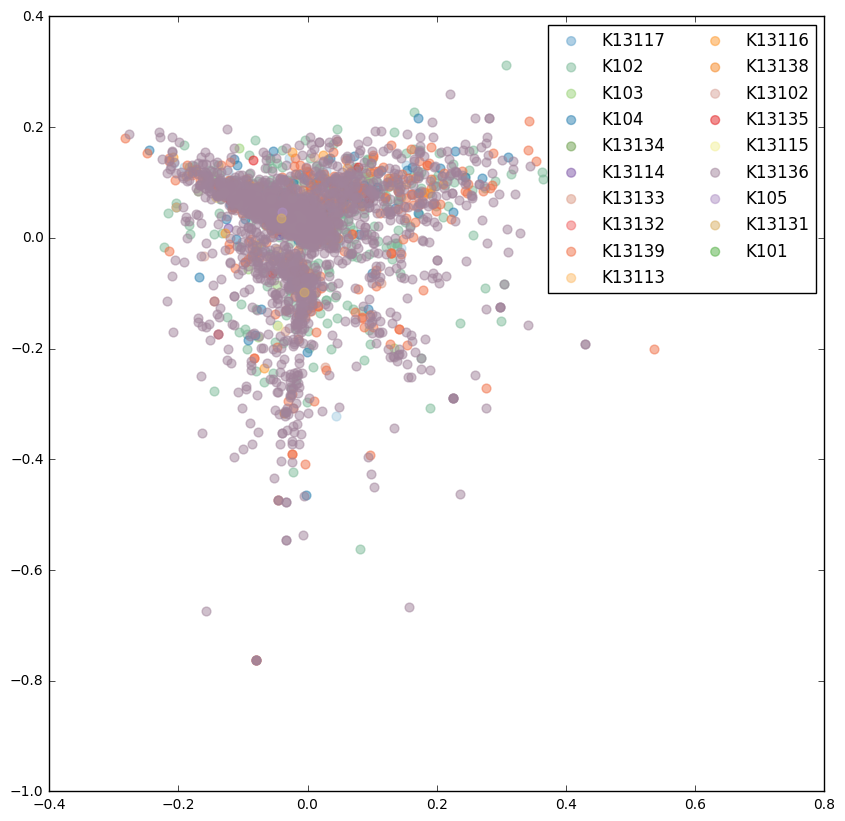

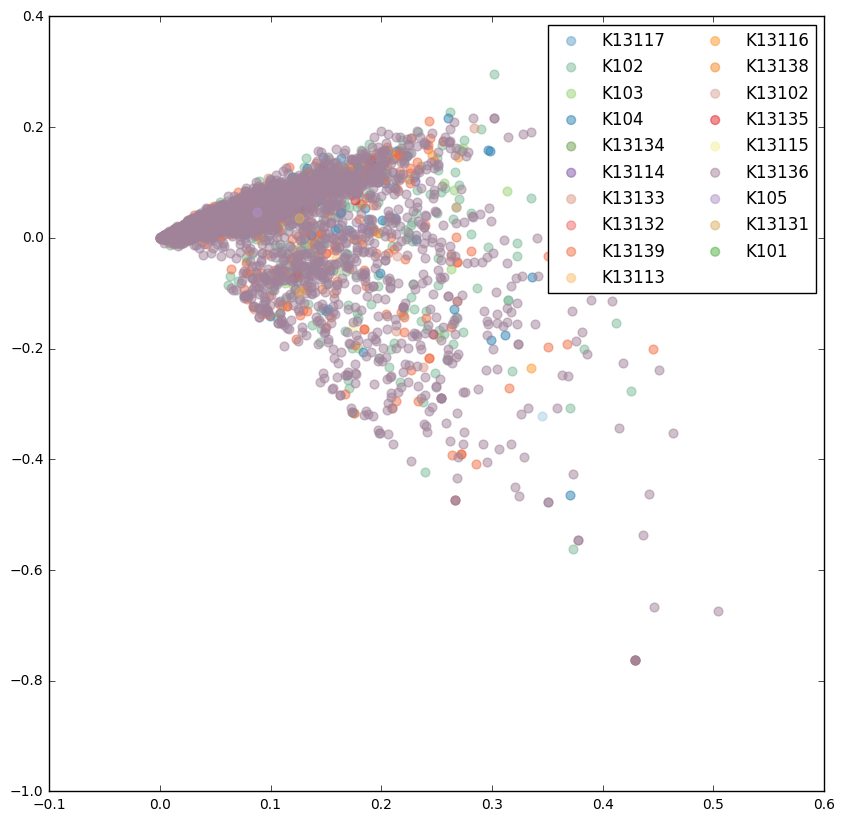

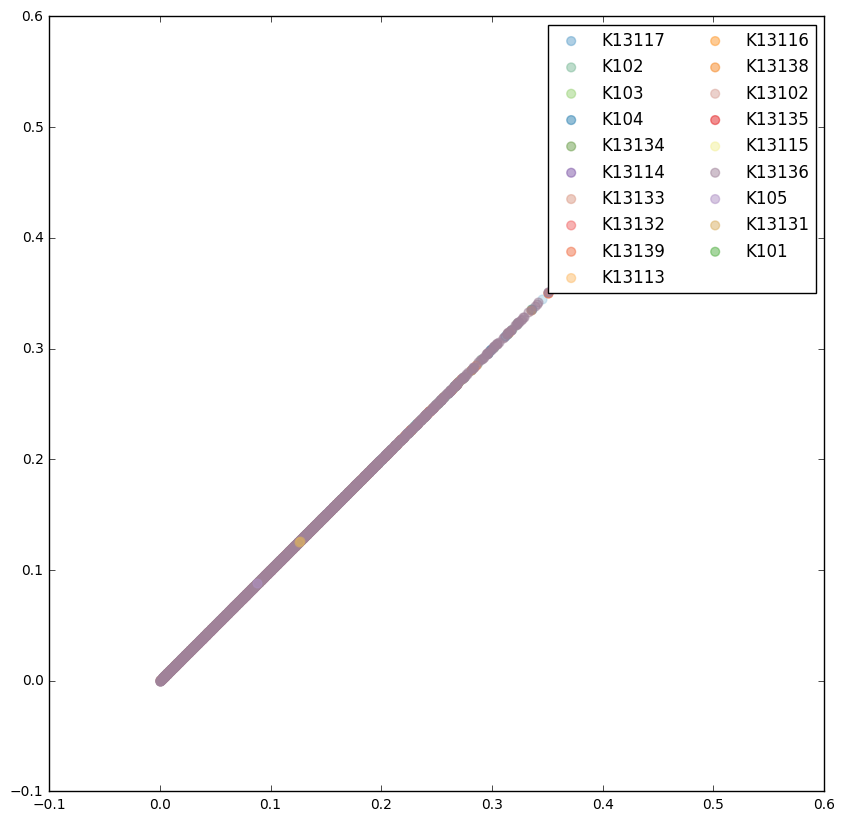

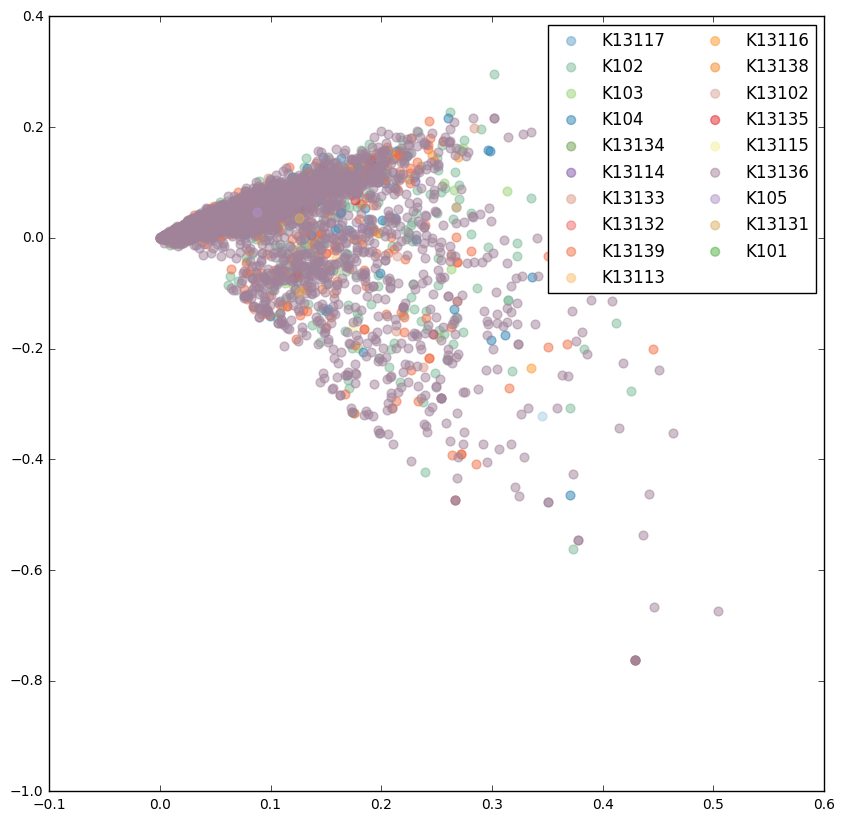

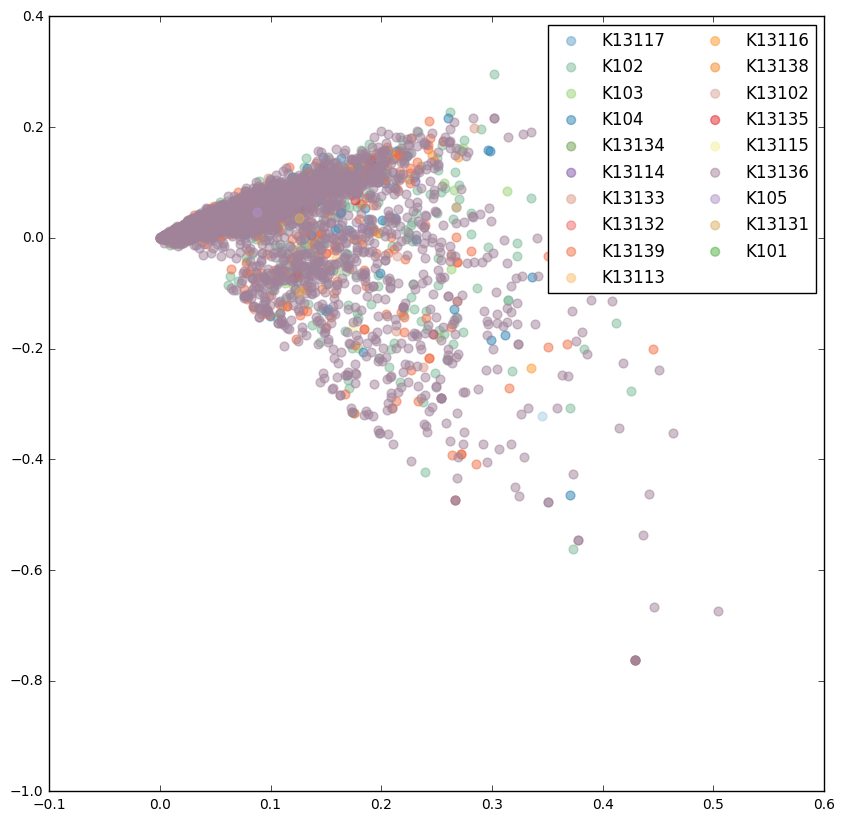

In [105]:
from collections import defaultdict
import pprint
import matplotlib.pyplot as plt

plot_axes(x=0, y=1)

x topic:
[('information', -0.55950617580396478), ('system', -0.54517775638470978), ('application', 0.24001265558600549), ('web', 0.18076528400280459), ('management', -0.15649499215966589), ('of', 0.15037970872540482), ('in', 0.13438733997438534), ('the', 0.12592093991975667), ('interface', 0.10387739674458007), ('data', 0.10233407370259412)]

y topic:
[('information', -0.55950617580396478), ('system', -0.54517775638470978), ('application', 0.24001265558600549), ('web', 0.18076528400280459), ('management', -0.15649499215966589), ('of', 0.15037970872540482), ('in', 0.13438733997438534), ('the', 0.12592093991975667), ('interface', 0.10387739674458007), ('data', 0.10233407370259412)]
next


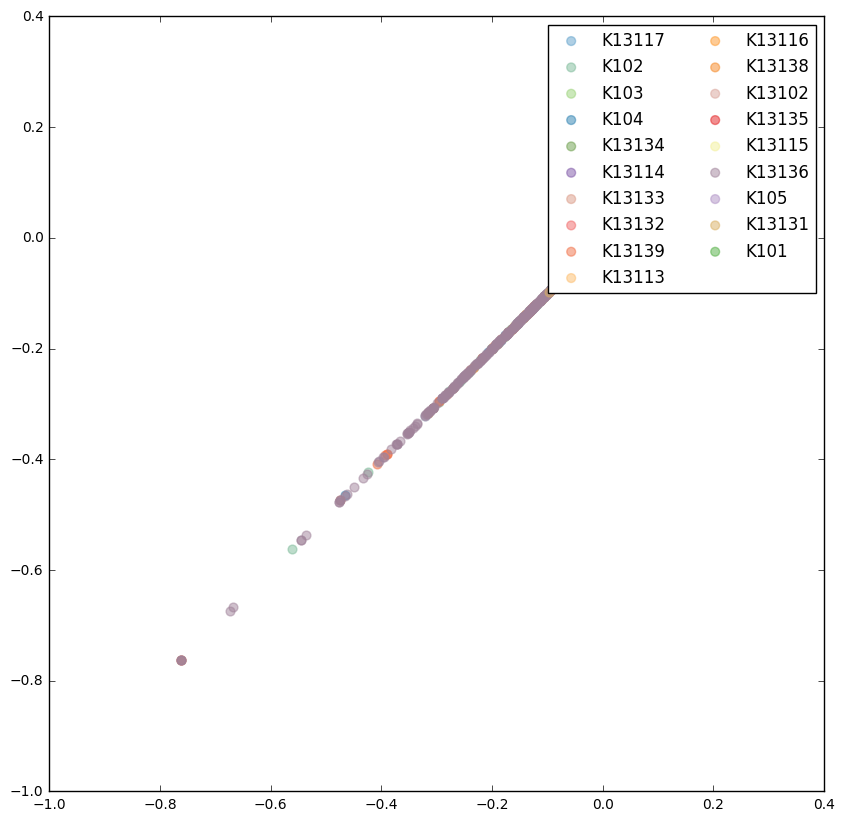

In [106]:
plot_axes(x=1, y=1)

x topic:
[('web', 0.55313702842406498), ('application', 0.34940973739092906), ('management', 0.31994020001264201), ('the', -0.2767098041289382), ('of', -0.25629118099967069), ('in', -0.18279018672572808), ('project', 0.17916020284906187), ('implementation', -0.16655122762269708), ('and', -0.13382213298057119), ('interface', 0.12654512238790699)]

y topic:
[('information', -0.55950617580396478), ('system', -0.54517775638470978), ('application', 0.24001265558600549), ('web', 0.18076528400280459), ('management', -0.15649499215966589), ('of', 0.15037970872540482), ('in', 0.13438733997438534), ('the', 0.12592093991975667), ('interface', 0.10387739674458007), ('data', 0.10233407370259412)]
next


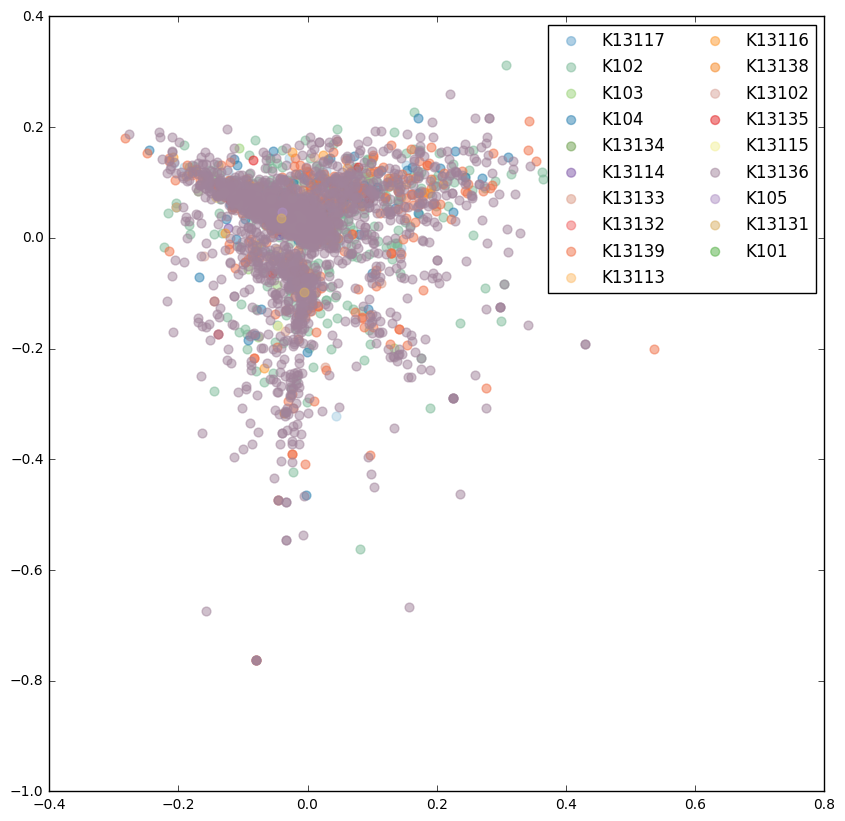

In [107]:
plot_axes(x=2, y=1)

x topic:
[('system', 0.37795221162317483), ('of', 0.30667720285333777), ('for', 0.29763124208033204), ('information', 0.27165121072447818), ('the', 0.24802550328530684), ('web', 0.2264657954273098), ('application', 0.19906685464793458), ('and', 0.19544917795603522), ('management', 0.19240727044420558), ('a', 0.16198243771977355)]

y topic:
[('management', 0.62193169715033714), ('project', 0.39455324616896054), ('web', -0.36925198631224104), ('information', -0.29356566129776823), ('software', 0.25541897164441407), ('content', 0.12588830821791666), ('interface', -0.12064891405670199), ('tool', 0.10354192870086973), ('service', -0.1003677023787168), ('network', 0.099935546864838451)]
next


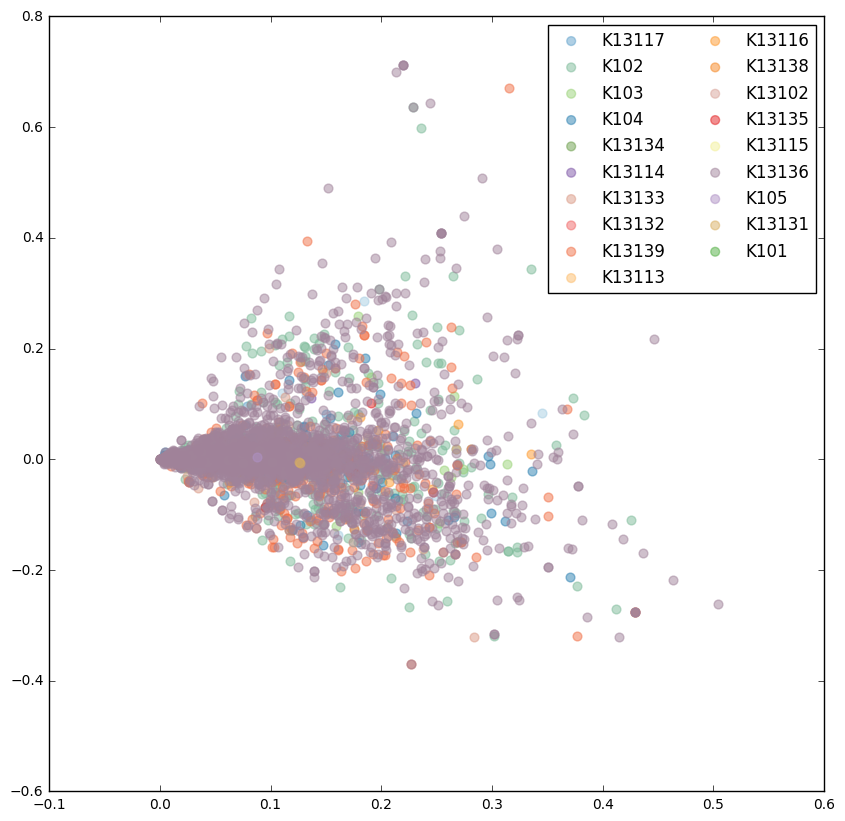

In [108]:
plot_axes(x=0, y=3)